In [1]:
# The API of tensorflow has been significantly changed in 2.0.
# For this reason, we use 1.14 this time.
# Please use the following command when you want to re-install tensorflow.
# =====================================================
# pip uninstall tensorflow -y
# pip install tensorflow==1.14

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
print(tf.__version__)

1.14.0


In [5]:
# x=4, y=3, standard deviation=2, number of plots=1000
x1 = np.random.normal(4, 2, 1000)
y1 = np.random.normal(3, 2, 1000)

# x=10, y=8, standard deviation=2, number of plots=1000
x2 = np.random.normal(10, 2, 1000)
y2 = np.random.normal(8, 2, 1000)

x_sum = np.append(x1, x2)
y_sum = np.append(y1, y2)

t = np.asarray([0.] * len(x1) + [1.] * len(x2))

<function matplotlib.pyplot.show(*args, **kw)>

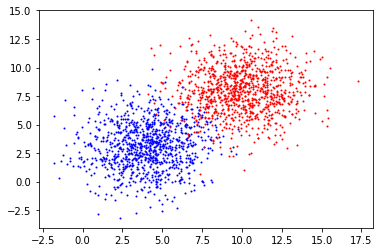

In [6]:
plt.plot(x1, y1, '.', color='blue', markersize=2)
plt.plot(x2, y2, '.', color='red', markersize=2)
plt.show

In [7]:
# learning rate
learning_rate = 0.1
# Number of times to repeat learning
training_epochs = 1000

In [8]:
# Placeholder with x-coordinates
X1 = tf.placeholder(tf.float32, shape=[None], name="x1")
# Placeholder with y-coordinates
X2 = tf.placeholder(tf.float32, shape=[None], name="x2")
# Placeholder with correct answer data
T = tf.placeholder(tf.float32, shape=[None], name="y")
# Variables with bias and weights
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

In [9]:
# Node that executes a sigmoidal function
model = tf.sigmoid(-(w[0] + w[1]*X1 + w[2]*X2))
# Node of the cross entropy error function
cost = -tf.reduce_mean(T*tf.log(model + 1e-7) + (1 - T)*tf.log(1 - model))

In [10]:
# solving a minimization problem
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# initialization node
init_op = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init_op)
    prev_err = 0
    
    # Repeat learning
    for epoch in range(training_epochs):
        
        # Calculation of error
        err, _ = sess.run([cost, train_op], feed_dict={X1: x_sum, X2: y_sum, T: t})
        epoch +=1
        
        if epoch % 100 == 0:
            print(' (', epoch, ') ', 'err= ', err, ' [', prev_err - err, '] ')
        if abs(prev_err - err) < 0.0001:
            print(' (', epoch, ') ', 'err= ', err, ' [', prev_err - err, '] ')
            break
            
        # Error Update
        prev_err = err
        
    # Get a weight value
    w_val = sess.run(w, feed_dict={X1: x_sum, X2: y_sum, T: t})

 ( 100 )  err=  0.4111176  [ 0.0013448596 ] 
 ( 200 )  err=  0.31500524  [ 0.0006861985 ] 
 ( 300 )  err=  0.2621953  [ 0.0004080832 ] 
 ( 400 )  err=  0.2290965  [ 0.0002695918 ] 
 ( 500 )  err=  0.20641205  [ 0.00019158423 ] 
 ( 600 )  err=  0.18986468  [ 0.00014340878 ] 
 ( 700 )  err=  0.1772341  [ 0.000111579895 ] 
 ( 749 )  err=  0.17206997  [ 9.9763274e-05 ] 


<function matplotlib.pyplot.show(*args, **kw)>

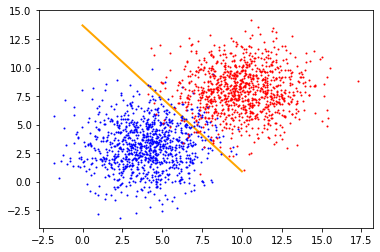

In [12]:
x_test = np.linspace(0, 10, 20)

# Plotting the boundaries
plt.plot(x_test,
            -(w_val[0] + w_val[1]*x_test) / w_val[2],
            color='orange', 
            linewidth=2)

plt.plot(x1, y1, '.', color='blue', markersize=2)
plt.plot(x2, y2, '.', color='red', markersize=2)
plt.show